**Name:** Sumaia Parveen Shupti


In [1]:
# Import required libraries here

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset from CSV File

df = pd.read_csv("DPhi - Learners - Beginners & Absolute Beginners - Real Dataset - DPhi_Learners.csv")
df.head()

,Learner_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Total_Score,Group_ID,Learner_Category
0,AB1,10,10,8,9,10,10,10,67,AB_G1,Absolute Beginner
1,AB2,10,10,10,9,10,9.09,-,58.09,AB_G1,Absolute Beginner
2,AB3,-,-,-,-,-,-,-,-,AB_G1,Absolute Beginner
3,AB4,-,-,-,-,-,-,-,-,AB_G1,Absolute Beginner
4,AB5,10,10,9,9,10,8.18,10,66.18,AB_G1,Absolute Beginner


**Question 1**: Fill all the missing values with 0. (Treat '-' as missing values)

In [3]:
# replace "-" by 0

df = df.replace("-", 0)
df.head()

,Learner_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Total_Score,Group_ID,Learner_Category
0,AB1,10,10,8,9,10,10,10,67,AB_G1,Absolute Beginner
1,AB2,10,10,10,9,10,9.09,0,58.09,AB_G1,Absolute Beginner
2,AB3,0,0,0,0,0,0,0,0,AB_G1,Absolute Beginner
3,AB4,0,0,0,0,0,0,0,0,AB_G1,Absolute Beginner
4,AB5,10,10,9,9,10,8.18,10,66.18,AB_G1,Absolute Beginner


In [4]:
# Quiz score columns are categorical in nature, convert it to numerical
# Your code goes here

cols = df.columns.drop(['Learner_ID', 'Group_ID', 'Learner_Category'])
df[cols] = df[cols].apply(pd.to_numeric)

df.head()

,Learner_ID,Quiz1,Quiz2,Quiz3,Quiz4,Quiz5,Quiz6,Quiz7,Total_Score,Group_ID,Learner_Category
0,AB1,10,10.0,8,9,10,10.00,10.0,67.00,AB_G1,Absolute Beginner
1,AB2,10,10.0,10,9,10,9.09,0.0,58.09,AB_G1,Absolute Beginner
2,AB3,0,0.0,0,0,0,0.00,0.0,0.00,AB_G1,Absolute Beginner
3,AB4,0,0.0,0,0,0,0.00,0.0,0.00,AB_G1,Absolute Beginner
4,AB5,10,10.0,9,9,10,8.18,10.0,66.18,AB_G1,Absolute Beginner


**Question 2:** Create a plot that would visualize the count of learners in each group and add a legend that would identify the learner catgory.

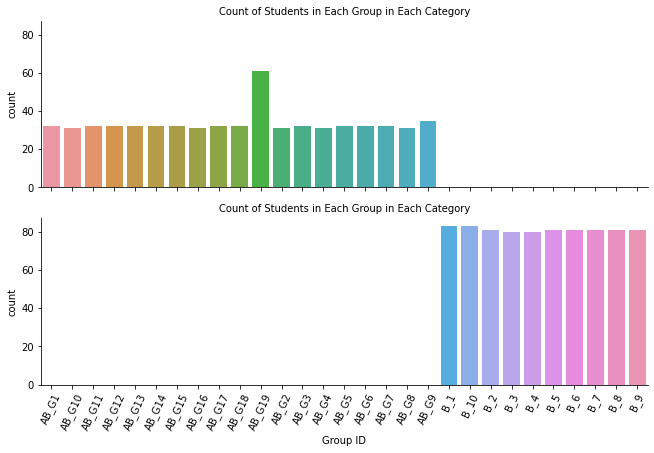

In [5]:
bars = sns.catplot(
    data = df[df['Learner_Category'].isin(['Absolute Beginner', 'Beginner'])],
    x = 'Group_ID',
    kind = 'count',
    row = 'Learner_Category',
    aspect = 3,
    height = 3,
    ci = None
)
bars.set_titles('Count of Students in Each Group in Each Category')
bars.set_xticklabels(rotation = 65, horizontalalignment = 'center')
bars.set_axis_labels("Group ID")

***Write your inferences here:***



*1.   All the Beginner groups have more or less 80 students.*

*2.   All the Absolute Beginner groups have around 35 students except for AB_G19. AB_G19 seems to have around 60 students.*





**Question 3:** Visualize the distribution of Total_Scores scored by each category of learners and share your inferences.
 
**Note:** You must ignore quiz score values = 0 while sharing your inferences as it is filled by us in Question 1  

In [6]:
# What the numbers of total score by each category looks like?

df_cat = df.groupby(['Learner_Category'])["Total_Score"].sum().sort_values(ascending = False)
df_cat

Learner_Category
Beginner             15419.99
Absolute Beginner    12523.50
Name: Total_Score, dtype: float64

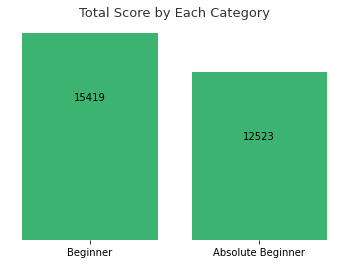

In [7]:
# let's plot!

plt.figure(figsize = [6, 4])

# change the bar color to be less bright blue
bars = plt.bar(df_cat.index, df_cat.values, align = 'center', linewidth = 0, color = 'mediumseagreen')

# set up the plt title
plt.title('Total Score by Each Category', alpha = 0.8, fontsize = 13)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.yticks([])

# remove frame on all sides
for spine in plt.gca().spines.values():
    spine.set_visible(False) 

# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5000, str(int(height)), 
                 ha ='center', color = 'black', fontsize = 10)

plt.show()

***Write your inferences here:***


*1.   The students of "Beginner" group seems to perform better in the quizzes than the other group.*

*2.   The total score of the "Absolute Beginner" group is 12523 which is 2896 less than the "Beginner" group.*



**Question 4:** Visualize/draw the trends of mean score of quizzes scored by different groups of learners (there are 19 groups) of the "absolute beginner" learner category.

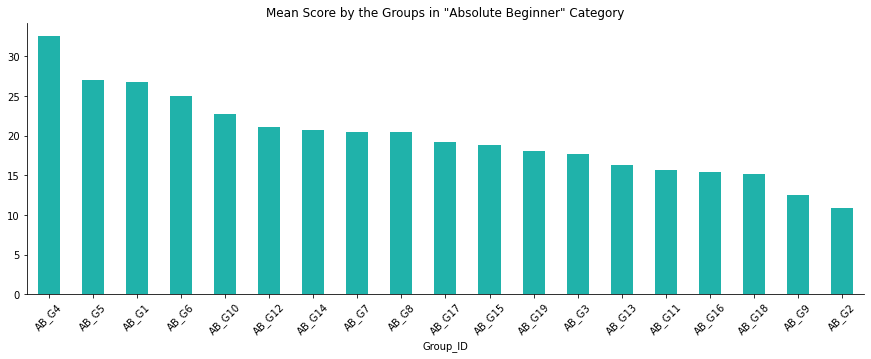

In [8]:
# Your code goes here

df_new = df[df['Learner_Category'] == 'Absolute Beginner']
label = df_new.groupby(['Group_ID'])["Total_Score"].mean().sort_values(ascending = False).index

plt.figure(figsize = [15, 5])

bar2 = df_new.groupby(['Group_ID'])["Total_Score"].mean().sort_values(ascending = False).plot.bar(color = 'lightseagreen', align = 'center')

bar2.set_title('Mean Score by the Groups in "Absolute Beginner" Category')
bar2.set_xticklabels(rotation = 45, horizontalalignment = 'center', labels = label)

bar2.spines['right'].set_visible(False) 
bar2.spines['top'].set_visible(False)

plt.show()

***Write your inference here:***


*1. The mean score of the top three groups (AB_G4, AB_G5, AB_G1) are between 25-30.*  

*2. The lowest value of the group mean is around 17 which belongs to AB_G2.*



**Question 5:** Visualize/draw the trends of mean score of quizzes scored by different groups of learners of the "beginner" learner category.

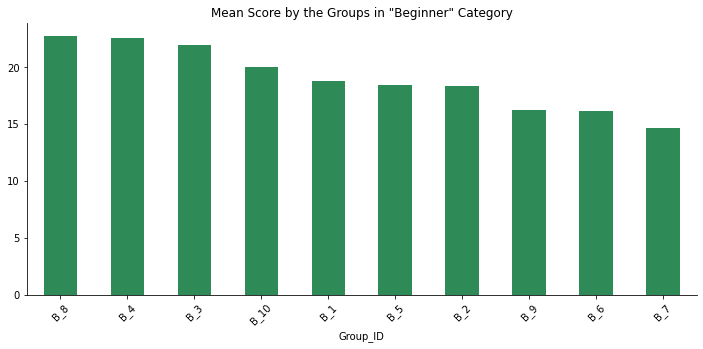

In [9]:
# Your code goes here

df_new2 = df[df['Learner_Category'] == 'Beginner']
label = df_new2.groupby(['Group_ID'])["Total_Score"].mean().sort_values(ascending = False).index

plt.figure(figsize = [12, 5])

bar3 = df_new2.groupby(['Group_ID'])["Total_Score"].mean().sort_values(ascending = False).plot.bar(color = 'seagreen', align = 'center')

bar3.set_title('Mean Score by the Groups in "Beginner" Category')
bar3.set_xticklabels(rotation = 45, horizontalalignment = 'center', labels = label)

bar3.spines['right'].set_visible(False) 
bar3.spines['top'].set_visible(False)

plt.show()

***Write your inference here:***


*1. The mean score of the top three groups (B_8, B_4, B_3) are between 22-30.*  

*2. The lowest value of the group mean is around 17 which belongs to B_7.*   

**Question 6:** Put your creative hats on and come up with any other intresting visualizations if you can. Play with the datset as much as you can, it is yours (yes, literally)!

Let's say we want to see how the students are doing in the quizzes based on the total number they secured in all 7 of them. Let's plot a histogram first. 

Text(0.5, 1.0, 'Visualization of Number of Students and their Total Score')

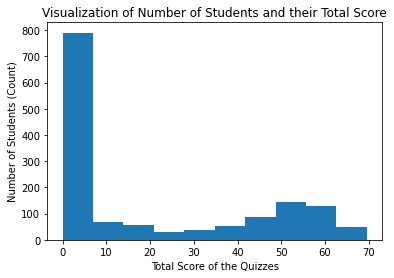

In [10]:
plt.hist(df["Total_Score"])

# set x/y labels and plot title
plt.xlabel("Total Score of the Quizzes")
plt.ylabel("Number of Students (Count)")
plt.title("Visualization of Number of Students and their Total Score")

Aparently, it's not clear how many students fall into a specific set of groups where we can define the score ranges.

Let's try to use binning method and make the visualization more interpretable. 

In [11]:
# we want 5 bins of scores here

bins = np.linspace(min(df["Total_Score"]), max(df["Total_Score"]), 6)
bins

array([ 0.  , 13.91, 27.82, 41.73, 55.64, 69.55])

In [12]:
# let's give the bins/groups some idenfyable names

group_names = ['Need Improvement' ,'Fair', 'Good', 'Excellent', 'Boss!']

In [13]:
#Let's put each of students into a specific group that we just defined. 

df['Groups_Score'] = pd.cut(df['Total_Score'], bins, labels = group_names, include_lowest = True )
df[['Total_Score','Groups_Score']].head()

,Total_Score,Groups_Score
0,67.00,Boss!
1,58.09,Boss!
2,0.00,Need Improvement
3,0.00,Need Improvement
4,66.18,Boss!


In [14]:
# how many students fall into each group??

df["Groups_Score"].value_counts()

Need Improvement    859
Excellent           235
Boss!               175
Good                 90
Fair                 88
Name: Groups_Score, dtype: int64

#### Let's plot the final results! 

Text(0.5, 1.0, 'Binned Student Performance')

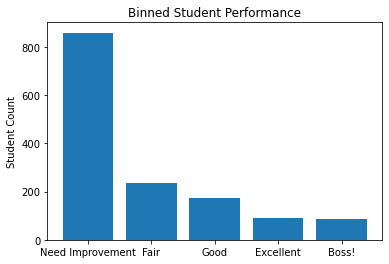

In [15]:
plt.bar(group_names, df["Groups_Score"].value_counts())


plt.ylabel("Student Count")
plt.title("Binned Student Performance")

We could have some idea about the mean score sof each group from the following boxplot. 

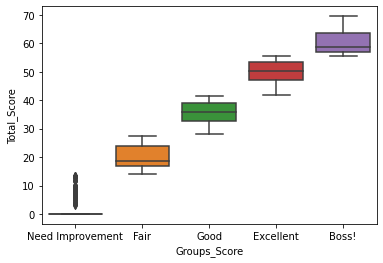

In [16]:
ax = sns.boxplot(x ="Groups_Score", y = "Total_Score", data = df)

Thanks coaches for all your hard work! Love yoy guys! <3 

-- Sumaia